# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


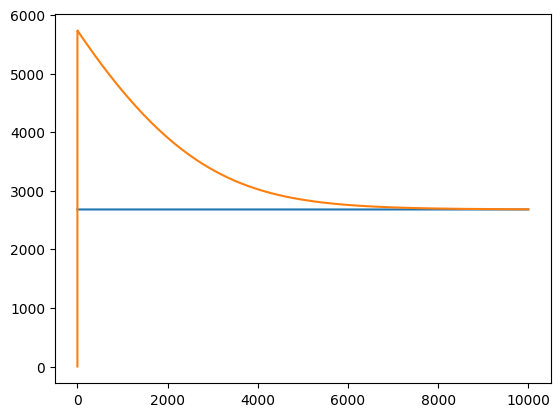

In [20]:

import numpy as np
import matplotlib.pyplot as plt

# Path of the file to read
filepath = "./nyc_bb_bicyclist_counts.csv"

#derivative of negative log likelihood for poission
def get_gradient(lam, data):
    n = len(data)
    return n - (1/lam) * sum(data)

data = np.loadtxt(filepath, delimiter=",", dtype="int", usecols=(4), skiprows=1)
mean = sum(data) / len(data)
lams = []
means = []
lam = 1
for i in range(10000):
    means.append(mean)
    lams.append(lam)
    lam = lam - 0.01 * get_gradient(lam, data)
    
plt.plot(means)
plt.plot(lams)
plt.show()


## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

In [23]:
import numpy as np

def get_gradient(lam, data):
    n = len(data)
    return n - (1/lam) * sum(data)

# define the loss function
def loss(w, X, y):
    y_pred = np.exp(np.dot(X, w))
    loss = ((y_pred - y) ** 2.0)
    return loss.mean(axis=None)

def grad_loss(w, X, y):
    y_hat = np.exp(np.dot(X, w))
    return -2*np.dot((y - y_hat)*y_hat, X)

def learn_weights(X, y, alpha=0.05, max_iter=30000, debug=False):
    w = np.array([0.0 for _ in range(X.shape[1])])

    if debug is True:
        print('initial weights = {}'.format(w))

    loss_trace = []
    weight_trace = []

    for i in range(max_iter):
        loss = grad_loss(w, X, y)
        w = w - (loss * alpha)
        if i % 2000 == 0 and debug is True:
            print('{}: loss = {}, weights = {}'.format(i, loss, w))

        loss_trace.append(loss)
        weight_trace.append(w)

    if debug is True:
        print('intercept + weights: {}'.format(w))

    loss_trace = np.array(loss_trace)
    weight_trace = np.array(weight_trace)

    return w, loss_trace, weight_trace

def plot_traces(w, loss_trace, weight_trace, alpha):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    ax[0].set_title(r'Log-loss of the weights over iterations, $\alpha=${}'.format(alpha))
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('log-loss')
    ax[0].plot(loss_trace[:, 0], label=r'$\beta$')
    ax[0].plot(loss_trace[:, 1], label=r'$x_0$')
    ax[0].plot(loss_trace[:, 2], label=r'$x_1$')
    ax[0].legend()

    ax[1].set_title(r'Weight learning over iterations, $\alpha=${}'.format(alpha))
    ax[1].set_xlabel('iteration')
    ax[1].set_ylabel('weight')
    ax[1].plot(weight_trace[:, 0], label=r'$\beta={:.2f}$'.format(w[0]))
    ax[1].plot(weight_trace[:, 1], label=r'$x_0={:.2f}$'.format(w[1]))
    ax[1].plot(weight_trace[:, 2], label=r'$x_1={:.2f}$'.format(w[2]))
    ax[1].legend()
    
filepath = "./nyc_bb_bicyclist_counts.csv"
alpha = 0.001
X = np.loadtxt(filepath, delimiter=",", dtype="int", usecols=(4), skiprows=1)
w_true = []
for i in range(len(X)):
    w_true.append(lam)
    lam = lam - 0.01 * get_gradient(lam, data)
w_true = np.array(w_true)
y = np.exp(np.dot(X, w_true))

w, loss_trace, weight_trace = learn_weights(X, y, alpha=alpha, max_iter=1000)
plot_traces(w, loss_trace, weight_trace, alpha=alpha)
print(w)

/var/folders/mk/p5y6cznx60788rys6_dnljxm0000gn/T/ipykernel_47672/4142286007.py:70: RuntimeWarning: overflow encountered in exp
  y = np.exp(np.dot(X, w_true))


IndexError: tuple index out of range